In [1]:
import numpy as np
from tensorflow.keras.datasets import reuters
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical

# load Dataset

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
print(len(train_data), len(test_data))
print(train_data[0])
print(train_labels[0])

8982 2246
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3


# Data Preprocessing

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1  # Set word indices to 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# One-hot encode labels
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)


# Build The model

In [84]:
from tensorflow.keras import regularizers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',
                       kernel_regularizer=regularizers.l2(0.001),
                       input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu',
                       kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))


model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                     │ (None, 64)                  │         640,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 46)                  │           2,990 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 647,214 (2.47 MB)

 Trainable params: 647,214 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

# Compiling the model

In [85]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Creating validation set

In [86]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

# Training the model

In [87]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.1480 - loss: 3.7214 - val_accuracy: 0.4820 - val_loss: 3.0775
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4073 - loss: 2.8991 - val_accuracy: 0.5410 - val_loss: 2.1614
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5321 - loss: 2.1908 - val_accuracy: 0.5600 - val_loss: 1.7811
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5659 - loss: 1.8896 - val_accuracy: 0.6210 - val_loss: 1.6337
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6031 - loss: 1.7240 - val_accuracy: 0.6560 - val_loss: 1.5290
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6372 - loss: 1.5990 - val_accuracy: 0.6900 - val_loss: 1.4514
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6696 - loss: 1.5111 - val_accuracy: 0.7070 - val_loss: 1.3931
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6939 - loss: 1.4197 - val_accuracy: 0.7200 - v

# Evaluate the model

In [88]:
results = model.evaluate(x_test, y_test)
print("Test loss, Test accuracy : ",results)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7636 - loss: 1.2644
Test loss, Test accuracy :  [1.2644015550613403, 0.7635797262191772]


# Make predictions

In [89]:
predictions = model.predict(x_test)
print(predictions[0])
print(np.argmax(predictions[0]))

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[1.9358179e-06 1.7187891e-04 7.2386536e-07 9.8896247e-01 8.3460659e-03
 6.6454227e-06 1.4931269e-05 7.5953380e-07 5.8952859e-04 3.4811819e-05
 9.0838739e-06 1.3549392e-04 1.3424788e-05 1.4526937e-04 3.5612643e-06
 2.0960306e-06 1.5413242e-04 2.6785037e-05 9.2650253e-06 6.8813295e-04
 1.6687301e-04 1.3577292e-04 4.1125122e-07 2.0045387e-05 3.5647133e-06
 2.0071557e-05 2.8540381e-07 4.2236325e-06 4.3266964e-06 4.3884284e-06
 2.8284758e-05 1.0338766e-04 2.4983192e-05 1.4094340e-06 7.9761776e-05
 4.9400484e-07 2.5426183e-05 1.3679762e-06 3.5763178e-06 3.9838902e-05
 7.8731046e-06 1.7519606e-06 3.9151055e-06 8.4261842e-07 4.7325312e-08
 1.8941557e-07]
3


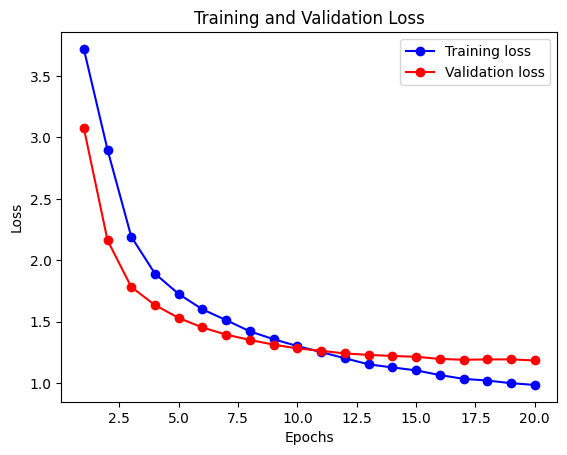

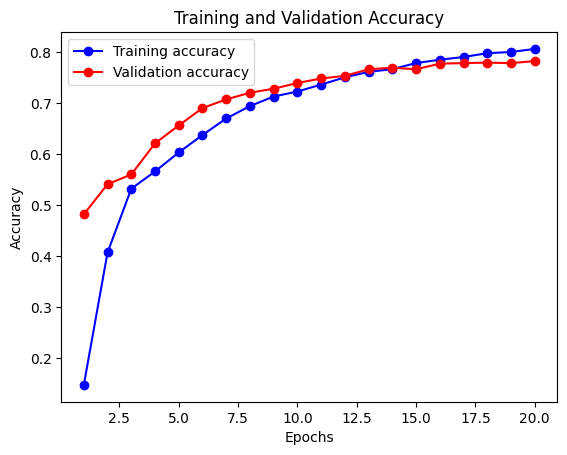

In [90]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1,len(loss)+1)

# Plot Loss
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Accuracy
plt.plot(epochs, accuracy, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
